<a href="https://colab.research.google.com/github/202422/Cryptocurrency-Closing-Price-Prediction/blob/main/Notebooks/Raw_data_exploration_cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Packages and Data Import**

In [69]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
df = pd.read_csv("/content/Train.csv")

In [71]:
pd.set_option("display.max_columns", None)

# **Data exploration**

In [72]:
df.columns

Index(['id', 'asset_id', 'open', 'high', 'low', 'volume', 'market_cap',
       'url_shares', 'unique_url_shares', 'reddit_posts', 'reddit_posts_score',
       'reddit_comments', 'reddit_comments_score', 'tweets', 'tweet_spam',
       'tweet_followers', 'tweet_quotes', 'tweet_retweets', 'tweet_replies',
       'tweet_favorites', 'tweet_sentiment1', 'tweet_sentiment2',
       'tweet_sentiment3', 'tweet_sentiment4', 'tweet_sentiment5',
       'tweet_sentiment_impact1', 'tweet_sentiment_impact2',
       'tweet_sentiment_impact3', 'tweet_sentiment_impact4',
       'tweet_sentiment_impact5', 'social_score', 'average_sentiment', 'news',
       'price_score', 'social_impact_score', 'correlation_rank',
       'galaxy_score', 'volatility', 'market_cap_rank',
       'percent_change_24h_rank', 'volume_24h_rank', 'social_volume_24h_rank',
       'social_score_24h_rank', 'medium', 'youtube', 'social_volume',
       'percent_change_24h', 'market_cap_global', 'close'],
      dtype='object')

In [73]:
continuous_vars = [
    # Prix
    'open', 'high', 'low', 'close',

    # Volume/Cap
    'volume', 'market_cap', 'market_cap_global',

    # Scores
    'average_sentiment', 'price_score', 'social_impact_score',
    'galaxy_score', 'volatility',

    # Impacts de sentiment
    'tweet_sentiment_impact1', 'tweet_sentiment_impact2',
    'tweet_sentiment_impact3', 'tweet_sentiment_impact4',
    'tweet_sentiment_impact5',

    # Social agrégé
    'social_score', 'social_volume',

    # Changement
    'percent_change_24h'
]

In [74]:
count_vars = [
    # Twitter
    'tweets', 'tweet_spam', 'tweet_followers', 'tweet_quotes',
    'tweet_retweets', 'tweet_replies', 'tweet_favorites',
    'tweet_sentiment1', 'tweet_sentiment2', 'tweet_sentiment3',
    'tweet_sentiment4', 'tweet_sentiment5',

    # Reddit
    'reddit_posts', 'reddit_posts_score', 'reddit_comments',
    'reddit_comments_score',

    # Contenu
    'url_shares', 'unique_url_shares', 'medium', 'youtube', 'news'
]

In [75]:
ordinal_vars = [
    'market_cap_rank', 'percent_change_24h_rank', 'volume_24h_rank',
    'social_volume_24h_rank', 'social_score_24h_rank', 'correlation_rank'
]

In [76]:
df.head(10)

,id,asset_id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,1,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,105.0,61.0,271.0,3420.0,1671.0,11675867.0,39.0,1343.0,448.0,2237.0,124.0,330.0,331.0,2515.0,120.0,506133.0,1326610.0,1159677.0,8406185.0,281329.0,11681999.0,3.6,69.0,2.7,3.6,3.3,66.0,0.007118,1.0,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,1,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,531.0,103.0,533.0,1491.0,242.0,5917814.0,195.0,1070.0,671.0,3888.0,1.0,52.0,315.0,1100.0,23.0,1320.0,381117.0,1706376.0,3754815.0,80010.0,5924770.0,3.7,1.0,2.0,2.0,1.0,43.5,0.009419,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,1,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,1152.0,187.0,905.0,9346.0,4013.0,47778746.0,104.0,2014.0,1099.0,11476.0,331.0,923.0,864.0,6786.0,442.0,9848462.0,5178557.0,2145663.0,25510267.0,5110490.0,47796942.0,3.7,22.0,3.1,3.0,3.3,65.5,0.013530,1.0,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484
3,ID_323y5P,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,424.0,268.0,443.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,285,NaN,NaN,NaN
4,ID_324kJH,1,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,42.0,50.0,173.0,3262.0,1652.0,14422172.0,21.0,511.0,190.0,2284.0,86.0,280.0,443.0,2284.0,169.0,311017.0,1977833.0,731277.0,10964321.0,440730.0,14426405.0,3.7,22.0,4.7,3.8,4.4,83.0,0.010332,1.0,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798216
5,ID_325hxw,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,53.0,140.0,146.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,145,NaN,NaN,NaN
6,ID_325m2L,1,9697.250948,9712.247413,9697.250948,1.231231e+09,1.767035e+11,1079.0,661.0,66.0,138.0,53.0,345.0,3890.0,401.0,30469074.0,98.0,1398.0,678.0,4066.0,102.0,181.0,861.0,2490.0,256.0,281173.0,1208072.0,2631596.0,25743321.0,611152.0,30476752.0,3.7,43.0,3.5,3.0,3.1,66.5,0.008594,1.0,656.0,2.0,1.0,1.0,NaN,NaN,4713,1.159070,2.807819e+11,9712.247413
7,ID_326vWj,1,8200.324549,8200.324549,8177.618366,4.763495e+08,1.473169e+11,981.0,727.0,20.0,407.0,84.0,530.0,1457.0,222.0,5333119.0,22.0,230.0,209.0,764.0,2.0,61.0,386.0,978.0,30.0,274.0,370430.0,951308.0,3893041.0,119291.0,5335608.0,3.7,4.0,5.0,4.0,3.3,80.0,0.003472,1.0,759.0,2.0,1.0,1.0,NaN,NaN,2292,-0.304804,2.218058e+11,8178.009040
8,ID_3277jX,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.0,810.0,160.0,444.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,175,NaN,NaN,NaN
9,ID_327FsT,1,46631.400268,46817.417045,46525.810946,3.049440e+09,8.678017e+11,1982.0,1333.0,93.0,437.0,137.0,435.0,13122.0,4166.0,77877585.0,224.0,4680.0,936.0,11944.0,577.0,1156.0,1057.0,9862.0,470.0,1143753.0,27348104.0,3757121.0,39740871.0,5905520.0,77898223.0,3.6,38.0,2.3,3.0,3.9,64.0,0.025162,1.0,1141.0,3.0,1.0,1.0,10.0,3.0,14723,0.470728,1.434610e+12,46570.843691


In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12632 entries, 0 to 12631
Data columns (total 49 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       12632 non-null  object 
 1   asset_id                 12632 non-null  int64  
 2   open                     8617 non-null   float64
 3   high                     8617 non-null   float64
 4   low                      8617 non-null   float64
 5   volume                   8605 non-null   float64
 6   market_cap               8379 non-null   float64
 7   url_shares               8575 non-null   float64
 8   unique_url_shares        8575 non-null   float64
 9   reddit_posts             12391 non-null  float64
 10  reddit_posts_score       12391 non-null  float64
 11  reddit_comments          12402 non-null  float64
 12  reddit_comments_score    12402 non-null  float64
 13  tweets                   8584 non-null   float64
 14  tweet_spam            

In [78]:
df["id"].is_unique

True

In [79]:
df["asset_id"].is_unique

False

In [80]:
df['asset_id'].value_counts()

,count
asset_id,
1,12632


In [81]:
df.drop(columns = ["asset_id"], inplace = True)

In [82]:
df.iloc[0,:]

,0
id,ID_322qz6
open,9422.849081
high,9428.490628
low,9422.849081
volume,713198620.0
market_cap,173763453624.0
url_shares,1689.0
unique_url_shares,817.0
reddit_posts,55.0
reddit_posts_score,105.0


In [83]:
df[df.duplicated()]

,id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close


## **Outcome**


In this step of exploration:

- I first divided the variables into three categories based on their nature: **continuous**, **count**, and **ordinal** features. This classification allowed me to choose appropriate imputation strategies for handling missing values.

- Afterward, I checked the column **`asset_id`**. The results showed that **all values in this column are equal to 1**, meaning it contains no variability and does not contribute any discriminative information to the model.  So I **removed it**


# **Missing values handling**

<Axes: >

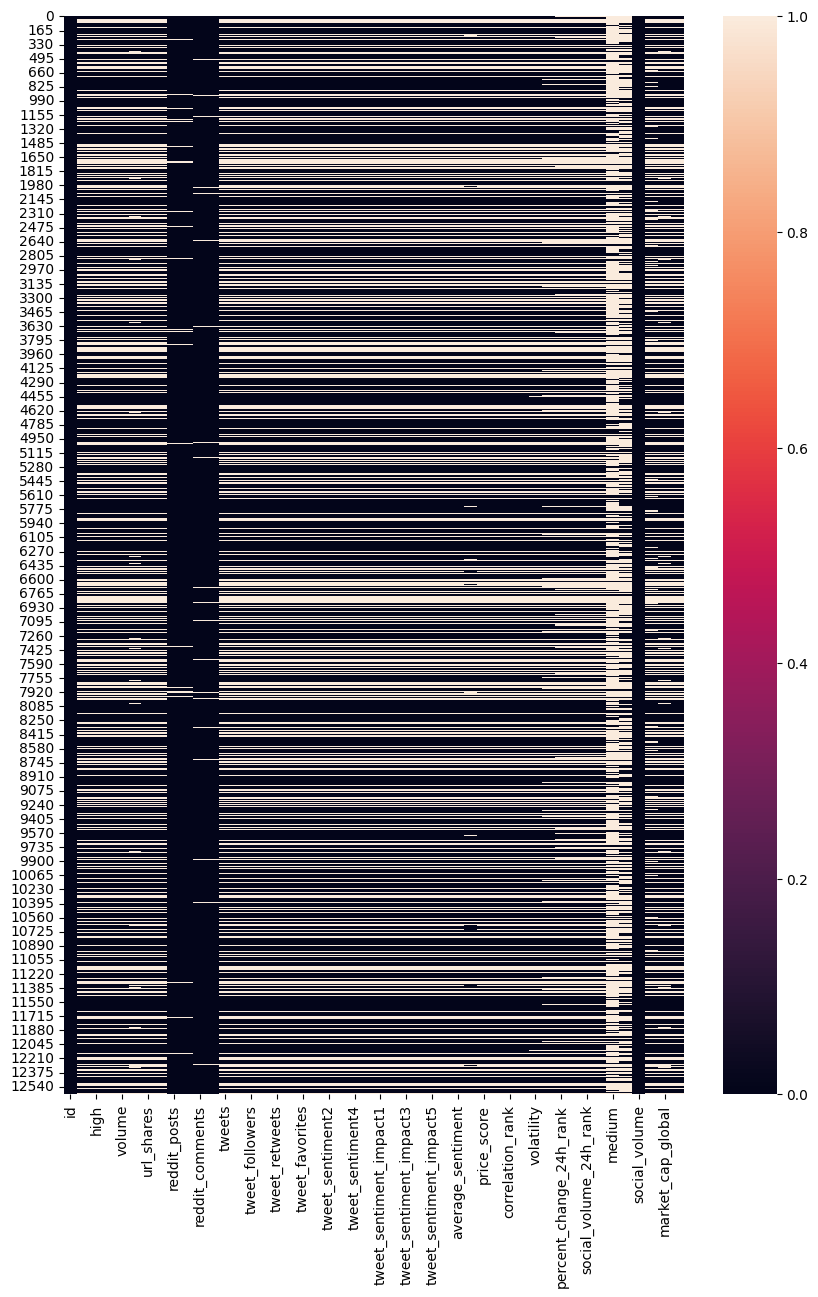

In [84]:
plt.figure(figsize = (10,14))
sns.heatmap(df.isna())

In [85]:
df2 = df[df["close"].notna()]
df2

,id,open,high,low,volume,market_cap,url_shares,unique_url_shares,reddit_posts,reddit_posts_score,reddit_comments,reddit_comments_score,tweets,tweet_spam,tweet_followers,tweet_quotes,tweet_retweets,tweet_replies,tweet_favorites,tweet_sentiment1,tweet_sentiment2,tweet_sentiment3,tweet_sentiment4,tweet_sentiment5,tweet_sentiment_impact1,tweet_sentiment_impact2,tweet_sentiment_impact3,tweet_sentiment_impact4,tweet_sentiment_impact5,social_score,average_sentiment,news,price_score,social_impact_score,correlation_rank,galaxy_score,volatility,market_cap_rank,percent_change_24h_rank,volume_24h_rank,social_volume_24h_rank,social_score_24h_rank,medium,youtube,social_volume,percent_change_24h,market_cap_global,close
0,ID_322qz6,9422.849081,9428.490628,9422.849081,7.131986e+08,1.737635e+11,1689.0,817.0,55.0,105.0,61.0,271.0,3420.0,1671.0,11675867.0,39.0,1343.0,448.0,2237.0,124.0,330.0,331.0,2515.0,120.0,506133.0,1326610.0,1159677.0,8406185.0,281329.0,11681999.0,3.6,69.0,2.7,3.6,3.3,66.0,0.007118,1.0,606.0,2.0,1.0,1.0,2.0,5.0,4422,1.434516,2.818066e+11,9428.279323
1,ID_3239o9,7985.359278,7992.059917,7967.567267,4.004755e+08,1.426942e+11,920.0,544.0,20.0,531.0,103.0,533.0,1491.0,242.0,5917814.0,195.0,1070.0,671.0,3888.0,1.0,52.0,315.0,1100.0,23.0,1320.0,381117.0,1706376.0,3754815.0,80010.0,5924770.0,3.7,1.0,2.0,2.0,1.0,43.5,0.009419,1.0,NaN,NaN,NaN,NaN,NaN,NaN,2159,-2.459507,2.126897e+11,7967.567267
2,ID_323J9k,49202.033778,49394.593518,49068.057046,3.017729e+09,9.166977e+11,1446.0,975.0,72.0,1152.0,187.0,905.0,9346.0,4013.0,47778746.0,104.0,2014.0,1099.0,11476.0,331.0,923.0,864.0,6786.0,442.0,9848462.0,5178557.0,2145663.0,25510267.0,5110490.0,47796942.0,3.7,22.0,3.1,3.0,3.3,65.5,0.013530,1.0,692.0,3.0,1.0,1.0,NaN,NaN,10602,4.942448,1.530712e+12,49120.738484
4,ID_324kJH,10535.737119,10535.737119,10384.798216,1.150053e+09,1.921183e+11,1012.0,638.0,24.0,42.0,50.0,173.0,3262.0,1652.0,14422172.0,21.0,511.0,190.0,2284.0,86.0,280.0,443.0,2284.0,169.0,311017.0,1977833.0,731277.0,10964321.0,440730.0,14426405.0,3.7,22.0,4.7,3.8,4.4,83.0,0.010332,1.0,749.0,2.0,1.0,1.0,NaN,2.0,3996,2.609576,3.386925e+11,10384.798216
6,ID_325m2L,9697.250948,9712.247413,9697.250948,1.231231e+09,1.767035e+11,1079.0,661.0,66.0,138.0,53.0,345.0,3890.0,401.0,30469074.0,98.0,1398.0,678.0,4066.0,102.0,181.0,861.0,2490.0,256.0,281173.0,1208072.0,2631596.0,25743321.0,611152.0,30476752.0,3.7,43.0,3.5,3.0,3.1,66.5,0.008594,1.0,656.0,2.0,1.0,1.0,NaN,NaN,4713,1.159070,2.807819e+11,9712.247413
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12626,ID_zwg5VZ,19215.293853,19219.559735,19214.640359,8.844918e+08,3.563280e+11,1302.0,841.0,61.0,513.0,101.0,421.0,4792.0,1868.0,23961117.0,100.0,935.0,365.0,4690.0,115.0,439.0,579.0,3462.0,197.0,1920165.0,3655243.0,3190489.0,14779550.0,421760.0,23969443.0,3.7,36.0,2.6,4.3,2.5,65.5,0.006747,1.0,787.0,2.0,1.0,1.0,1.0,2.0,5831,0.266681,5.690401e+11,19219.559735
12628,ID_zydeys,7294.506136,7306.701928,7292.729876,3.816704e+08,1.322473e+11,605.0,462.0,16.0,217.0,39.0,156.0,1501.0,241.0,10909376.0,9.0,170.0,44.0,292.0,35.0,51.0,358.0,973.0,84.0,163376.0,304833.0,775658.0,9213680.0,452344.0,10910586.0,3.7,2.0,3.3,3.0,2.6,63.0,0.019912,1.0,1007.0,2.0,1.0,1.0,NaN,NaN,2020,NaN,1.978198e+11,7303.640282
12629,ID_zyfj4W,8811.121632,8832.560173,8754.602574,2.412260e+09,1.621298e+11,1653.0,757.0,74.0,249.0,60.0,107.0,4852.0,513.0,14878543.0,92.0,1127.0,454.0,3252.0,144.0,203.0,952.0,3101.0,452.0,617875.0,656816.0,2617007.0,10307241.0,684529.0,14885477.0,3.7,44.0,2.8,3.0,3.9,67.0,0.020715,1.0,918.0,2.0,1.0,1.0,1.0,2.0,5787,NaN,2.493421e+11,8828.440234
12630,ID_zz5eGB,9661.514681,9662.196605,9645.133934,9.861517e+08,1.774933e+11,1376.0,657.0,39.0,81.0,43.0,122.0,3915.0,675.0,14439095.0,153.0,871.0,274.0,3343.0,74.0,188.0,671.0,2691.0,291.0,278732.0,360131.0,1733775.0,10881941.0,1189157.0,14445315.0,3.8,25.0,3.0,4.4,

<Axes: >

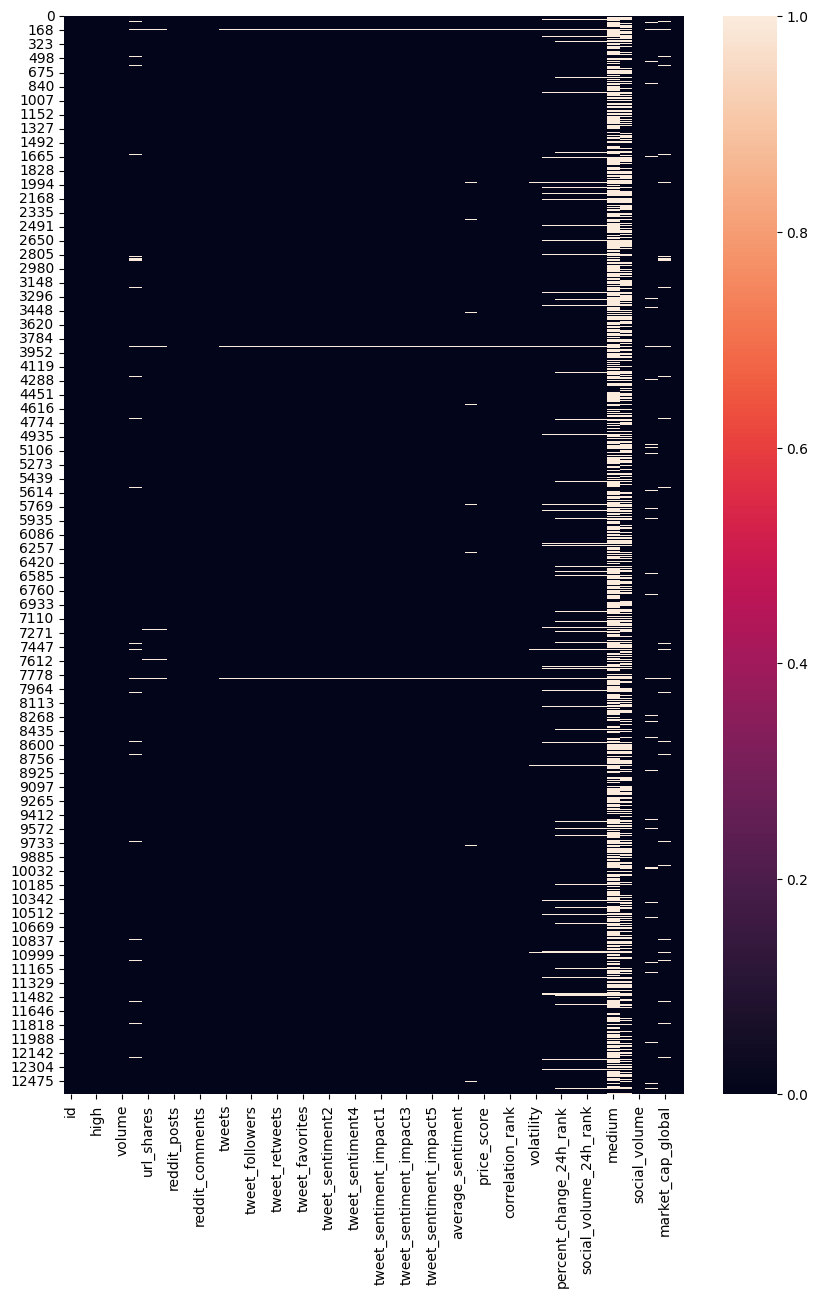

In [86]:
plt.figure(figsize = (10,14))
sns.heatmap(df2.isna())

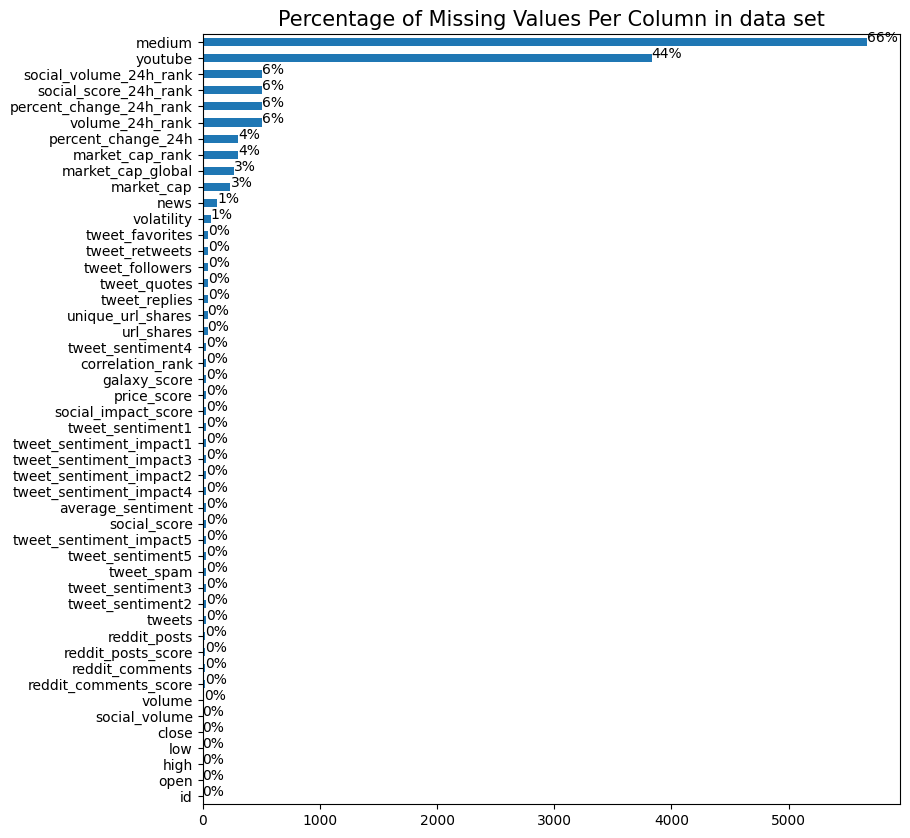

In [87]:
# Check if there are any missing values in data set
ax = df2.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in data set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/df2.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

In [88]:
df3 = df2.drop(columns = ["medium", "youtube"])

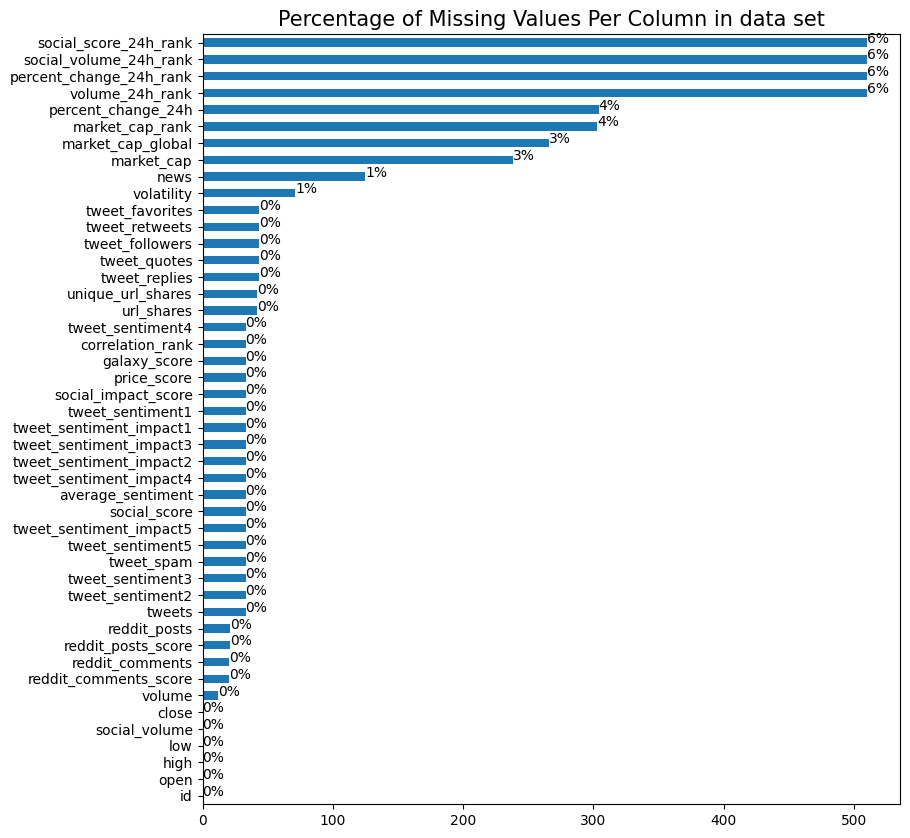

In [89]:
# Check if there are any missing values in data set
ax = df3.isna().sum().sort_values().plot(kind = 'barh', figsize = (9, 10))
plt.title('Percentage of Missing Values Per Column in data set', fontdict={'size':15})
for p in ax.patches:
    percentage ='{:,.0f}%'.format((p.get_width()/df3.shape[0])*100)
    width, height =p.get_width(),p.get_height()
    x=p.get_x()+width+0.02
    y=p.get_y()+height/2
    ax.annotate(percentage,(x,y))

<Axes: >

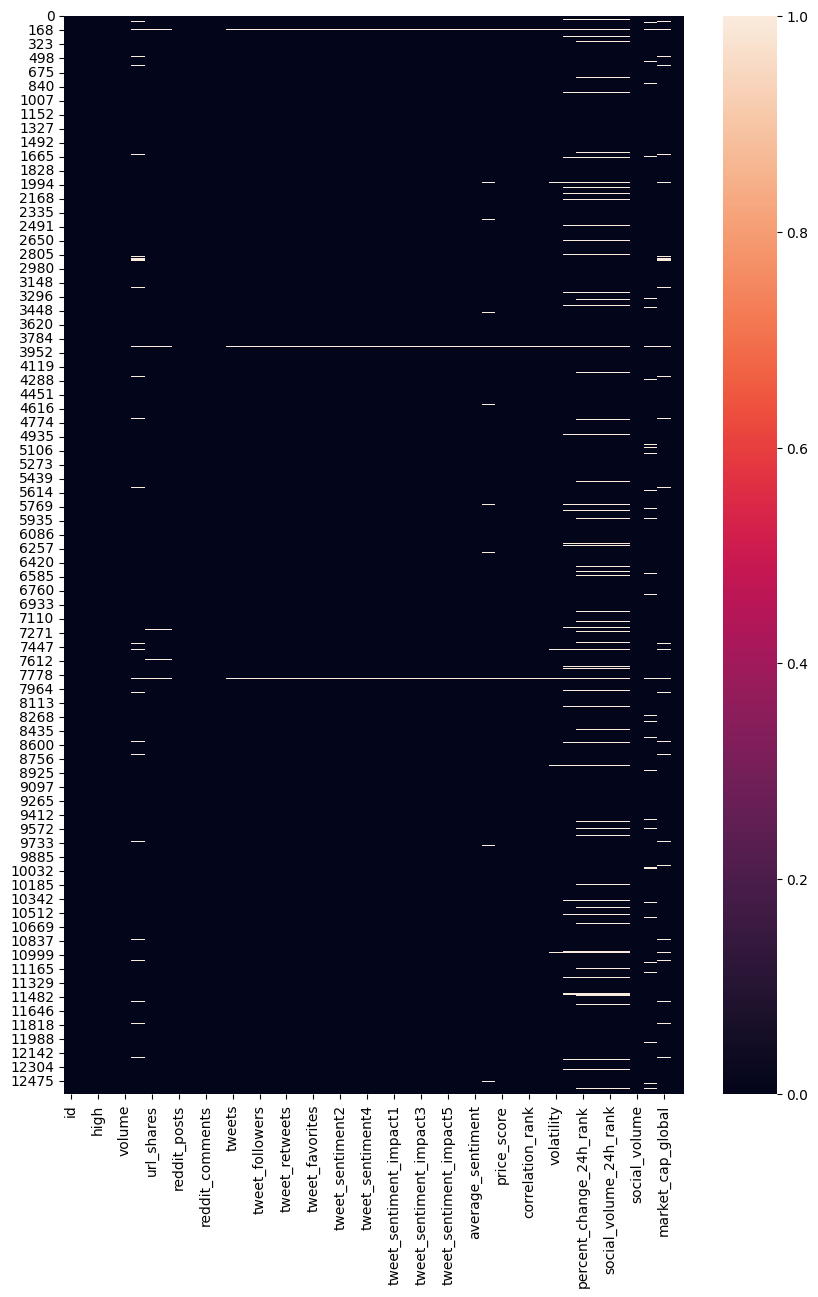

In [90]:
plt.figure(figsize = (10,14))
sns.heatmap(df3.isna())

In [91]:
columns_with_missing = list(df3.columns[df3.isna().any()])
columns_with_missing

['volume',
 'market_cap',
 'url_shares',
 'unique_url_shares',
 'reddit_posts',
 'reddit_posts_score',
 'reddit_comments',
 'reddit_comments_score',
 'tweets',
 'tweet_spam',
 'tweet_followers',
 'tweet_quotes',
 'tweet_retweets',
 'tweet_replies',
 'tweet_favorites',
 'tweet_sentiment1',
 'tweet_sentiment2',
 'tweet_sentiment3',
 'tweet_sentiment4',
 'tweet_sentiment5',
 'tweet_sentiment_impact1',
 'tweet_sentiment_impact2',
 'tweet_sentiment_impact3',
 'tweet_sentiment_impact4',
 'tweet_sentiment_impact5',
 'social_score',
 'average_sentiment',
 'news',
 'price_score',
 'social_impact_score',
 'correlation_rank',
 'galaxy_score',
 'volatility',
 'market_cap_rank',
 'percent_change_24h_rank',
 'volume_24h_rank',
 'social_volume_24h_rank',
 'social_score_24h_rank',
 'percent_change_24h',
 'market_cap_global']

In [92]:
df4 = df3.copy()

In [93]:
for col in columns_with_missing:
    value = df4[col].mean() if col in continuous_vars else df4[col].mode()[0]
    df4[col].fillna(value=value, inplace=True)

/tmp/ipython-input-1913322145.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df4[col].fillna(value=value, inplace=True)


In [94]:
df4.isna().any().sum()

np.int64(0)

### **Outcome**

* All rows with missing values in `close` were removed because it's the target column

* The columns **`medium`** and **`youtube`** were dropped because these columns contained more than **60% missing values**, making them unsuitable for meaningful imputation.

* **Continuous variables** were imputed using the **mean** and **Non-continuous variables**  were imputed using the **mode**.


In [96]:
df4.to_csv("df_cleaned.csv", index = False)